In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import mglearn
import sklearn

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [6]:
cancer = load_breast_cancer()

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [9]:
gbrt = GradientBoostingClassifier(random_state=0)

In [10]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [11]:
print("Accuracy on training set: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000000
Accuracy on test set: 0.958042


**Since the training set accuracy is 100%, we are likely to be over-fitting. We can apply stronger pre-punining by limmiting maximum depth or lower the learining rate.**

In [12]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

In [13]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [14]:
print("Accuracy on training set: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.990610
Accuracy on test set: 0.972028


In [15]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)

In [16]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [17]:
print("Accuracy on training set: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988263
Accuracy on test set: 0.965035


**We can visualize the feature importances to get more insight on the model.**

In [18]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

In [19]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

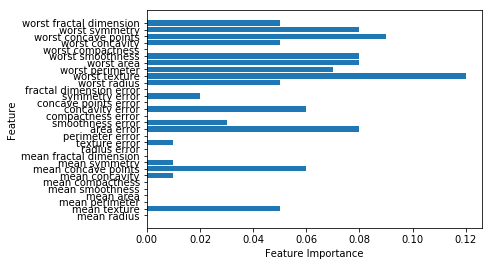

In [21]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(gbrt)